## 08.Time_Series

### In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:
https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv

Hint:

    Following is the command import
    packages and data 
    from pandas import read_csv 
    from pandas import datetime
    from matplotlib import pyplot
    from statsmodels.tsa.arima_model import ARIMA 
    from sklearn.metrics import mean_squared_error 

    def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
        series = read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0],
    index_col=0, squeeze=True, date_parser=parser)

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('datafiles/sales-of-shampoo-over-a-three-ye.csv', sep=';')

In [3]:
df.head()

,Month,Sales
0,01-01,266.0
1,01-02,145.9
2,01-03,183.1
3,01-04,119.3
4,01-05,180.3


In [4]:
df.to_csv('datafiles/sales-of-shampoo.csv',index=False)

In [5]:
def parser(x):
    return datetime.datetime.strptime('19'+x, '%Y-%m')

series = pd.read_csv('datafiles/sales-of-shampoo.csv', header=0,parse_dates=[0],index_col=0, date_parser=parser)

In [6]:
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


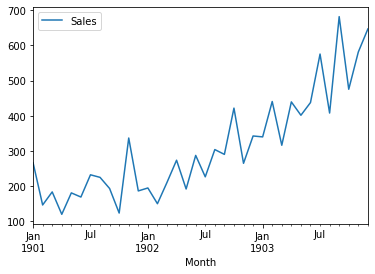

In [7]:
series.plot()
plt.show()

From here we can see that Shampoo sales data has a clear trend, that means time series is not stationary and will require differencing to make it stationary.

In [8]:
from statsmodels.tsa.stattools import adfuller  
from numpy import log  

In [9]:
res = adfuller(series.values)
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  

Augmented Dickey-Fuller Statistic: 3.060142
p-value: 1.000000


In [10]:
X = series.values

In [11]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [12]:
train, test = X[0:size], X[size:len(X)]

In [13]:
train

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9]])

In [14]:
import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))

In [15]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 234.90582659868073
(0, 0, 1) 236.90567037723477
(0, 0, 2) 238.0855970253011
(0, 0, 3) 239.74303850994136
(0, 0, 4) 236.6663944689482
(0, 0, 5) 238.6584024865358
(0, 1, 0) 235.47288692467143
(0, 1, 1) 226.1203459660081
(0, 1, 2) 227.13063405262932
(0, 1, 3) 229.1306336530206
(0, 1, 4) 229.36535764377922
(0, 1, 5) nan
(0, 2, 0) 246.22885151836354
(0, 2, 1) 229.66157904113322
(0, 2, 2) 220.56961829077005
(0, 2, 3) 222.01173493127104
(0, 2, 4) 224.58240905014924
(0, 2, 5) nan
(0, 3, 0) 256.51138971229454
(0, 3, 1) 238.87471191398177
(0, 3, 2) 225.5257887614249
(0, 3, 3) 219.92987204094612
(0, 3, 4) 221.48770490061307
(0, 3, 5) nan
(0, 4, 0) 264.8249043327676
(0, 4, 1) 246.8919993113172
(0, 4, 2) 232.2770562085988
(0, 4, 3) 221.79182590032536
(0, 4, 4) 218.33094336496126
(0, 4, 5) nan
(0, 5, 0) 270.680526289448
(0, 5, 1) 253.20623509904848
(0, 5, 2) 237.98195259906936
(0, 5, 3) 225.82528598064175
(0, 5, 4) nan
(0, 5, 5) 238.86730093140056
(1, 0, 0) 236.90560256584652
(1, 0, 1) 238

In [16]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print(f"TEST MSE :{error}")

Predicted=279.426042600266,Expected =[421.6]
Predicted=330.9428703984024,Expected =[264.5]
Predicted=382.65816552075285,Expected =[342.3]
Predicted=327.3616853573442,Expected =[339.7]
Predicted=409.53499387945277,Expected =[440.4]
Predicted=374.70927587213157,Expected =[315.9]
Predicted=402.95026174716503,Expected =[439.3]
Predicted=371.6986729621017,Expected =[401.3]
Predicted=464.93099953397984,Expected =[437.4]
Predicted=413.2957039216841,Expected =[575.5]
Predicted=461.48319805710355,Expected =[407.6]
Predicted=531.9424047889013,Expected =[682.]
Predicted=467.70413240453263,Expected =[475.3]
Predicted=682.7913655829427,Expected =[581.3]
Predicted=594.7085356723969,Expected =[646.9]
TEST MSE :6572.589349524061


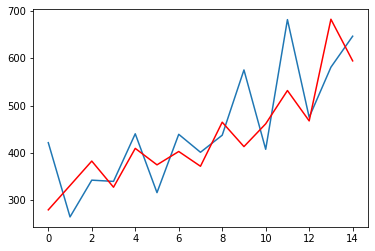

In [17]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

####  Model 2

In [18]:
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [19]:
result = seasonal_decompose(series['Sales'], model ='multiplicative')

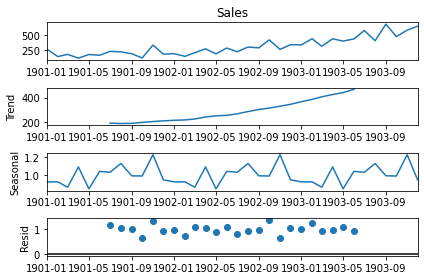

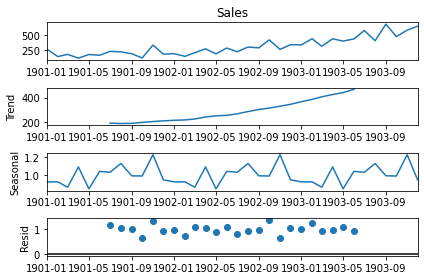

In [20]:
# ETS plot 
result.plot()

In [21]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Fit auto_arima function to dataset
stepwise_fit = auto_arima(series['Sales'], start_p = 1, start_q = 1,
                          max_p = 5, max_q = 5, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=285.779, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=305.954, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=287.610, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=289.951, Time=0.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=286.063, Time=0.10 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=1.02 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=285.464, Time=0.20 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=286.475, Time=1.13 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=288.482, Time=1.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=289.967, Time=0.17 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=287.237, Time=0.25 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=303.591, Time=0.11 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -138.732
Date:                             Tue, 23 May 2023   AIC                            285.464
Time:                                     15:50:29   BIC                            290.006
Sample:                                 01-01-1901   HQIC                           286.606
                                      - 12-01-1903                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5838      0.435     -1.342      0.179      -1.436       0.269
ma.L1         -0.5236      0.340     -1.539      0.124      -1.190       0.143
ar.S.L12      -0.4976      0.622     -0.800      0.424      -1.717       0.722
sigma2      8404.8078   6127.507      1.372      0.170   -3604.885    2.04e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.41   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.12   Prob(JB):                         0.81
Heteroskedasticity (H):               1.96   Skew:                             0.27
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
train = series.iloc[:len(series)-12]
test = series.iloc[len(series)-12:] # set one year(12 months) for testing
  
train

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


In [24]:
# Fit a SARIMAX(1, 1, 1)x(1, 1, [], 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Sales'],
                order = (1, 1, 1), 
                seasonal_order =(1, 1, [], 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -67.242
Date:                             Tue, 23 May 2023   AIC                            142.483
Time:                                     15:50:30   BIC                            144.075
Sample:                                 01-01-1901   HQIC                           141.480
                                      - 12-01-1902                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5129      0.880     -0.583      0.560      -2.237       1.212
ma.L1         -0.6450      0.651     -0.990      0.322      -1.922       0.632
ar.S.L12       0.9860      4.508      0.219      0.827      -7.850       9.822
sigma2       300.8301   9.62e+04      0.003      0.998   -1.88e+05    1.89e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.71   Prob(JB):                         0.71
Heteroskedasticity (H):               2.03   Skew:                             0.62
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

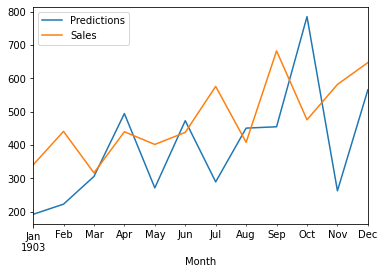

In [25]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['Sales'].plot(legend = True)


In [26]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Sales"], predictions)

# Calculate mean squared error
mean_squared_error(test["Sales"], predictions)


35922.9943173228

In [27]:
35922**.5


189.53100010288554

### Model 3

In [52]:
# check prophet version
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [38]:
def parser(x):
    return datetime.datetime.strptime('19'+x, '%Y-%m')

series = pd.read_csv('datafiles/sales-of-shampoo.csv', header=0,parse_dates=[0],date_parser=parser)

In [39]:
series.head()

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [40]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(series['Month'])
df['y'] = series['Sales']
df.head()

,ds,y
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [41]:
m = Prophet()
m.fit(df)

15:55:24 - cmdstanpy - INFO - Chain [1] start processing
15:55:24 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future = m.make_future_dataframe(periods=12,freq='M')

In [47]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower',
          'yhat_upper', 'trend',
          'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
43,1904-07-31,443.500352,372.488135,519.768804,618.632208,618.546514,618.714716
44,1904-08-31,810.399717,738.000769,883.574106,630.708649,630.606440,630.810048
45,1904-09-30,625.644958,555.440604,701.179382,642.395526,642.271434,642.515033
46,1904-10-31,595.756411,521.420998,668.692177,654.471967,654.329531,654.611977
47,1904-11-30,839.105809,766.026097,911.538875,666.158844,665.997674,666.320858


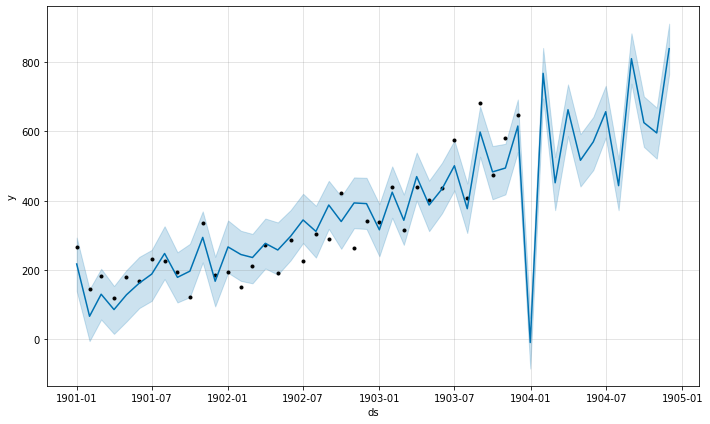

In [48]:
fig1 = m.plot(forecast)

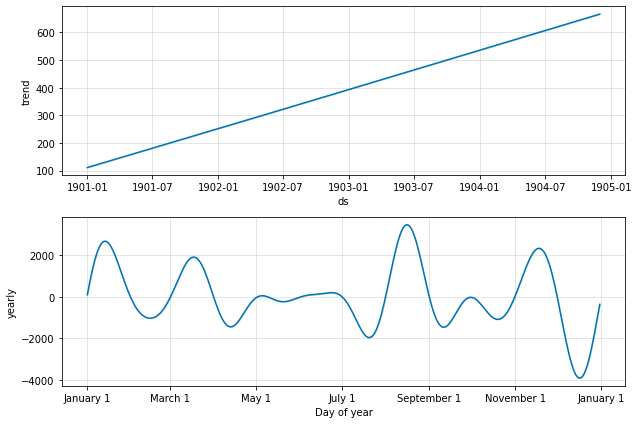

In [49]:
fig2 = m.plot_components(forecast)

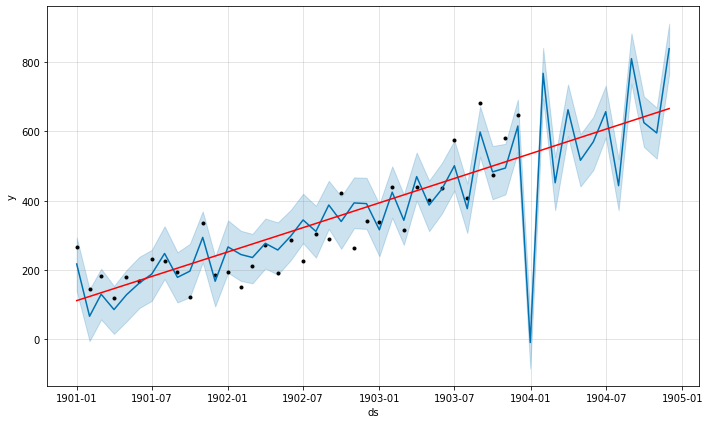

In [53]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)